In [1]:
import csv
import os
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter, defaultdict
from itertools import cycle, combinations
from operator import itemgetter
from sklearn import datasets, metrics, tree
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn import datasets
from apyori import apriori
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from sklearn.decomposition import NMF, LatentDirichletAllocation
pd.options.mode.chained_assignment = None 
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
mpl.style.use('seaborn-pastel')
sns.set_style('whitegrid')

/home/julia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
/home/julia/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
all_begs = ['product/productId: ', 'product/title: ', 
     'product/price: ', 'review/userId: ',
     'review/profileName: ', 'review/helpfulness: ',
     'review/score: ', 'review/time: ', 'review/summary: ',
     'review/text: ']
col_names = ['productID', 'title', 'price', 'userID', 'profileName', 'helpfulness', 'score',
                    'time', 'summary', 'text']

df = pd.read_csv("dataset.csv") 
df['time'] = pd.to_datetime(df['time'],unit='s')
df = df.drop(['profileName'], axis=1)
col_names.remove('profileName')
all_begs.remove('review/profileName: ')
df["summary"].fillna("none", inplace = True) 
df['summary_len'] = [len(summary) for summary in df['summary']]
df['text_len'] = [len(text) for text in df['text']]

# Wordclouds

In [15]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
# because wordcloud's stopwords parameter left all "the phone", "this phone", "that phone"...
text = " ".join([ " ".join([a.lower() for a in e.split(" ") if a.lower() not in stopwords]) for e in df.text])



In [20]:
wordcloud = WordCloud(background_color='white',width=1000, height=500, margin=2)
wordcloud.generate(text)

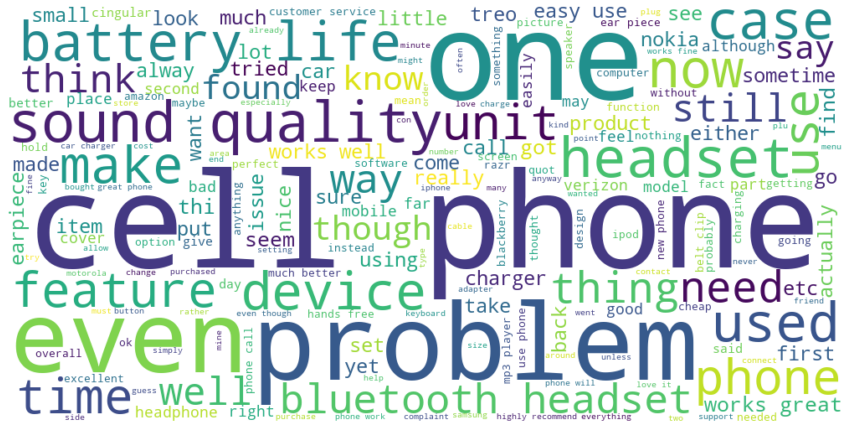

In [21]:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/all_wordcloud.png')
plt.show()

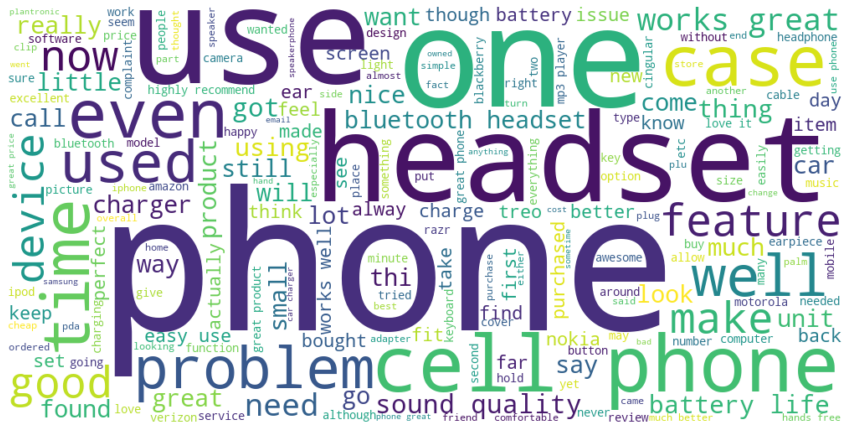

In [12]:
score5 = df.loc[df['score'] == 5]
s5 = " ".join([ " ".join([a.lower() for a in e.split(" ") if a.lower() not in stopwords]) for e in score5.text])

wordcloud.generate(s5)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/wordcloud5.png')
plt.show()

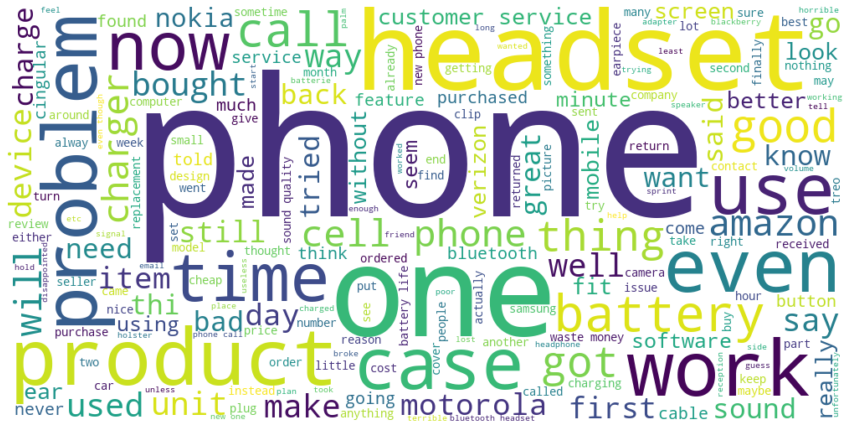

In [13]:
score1 = df.loc[df['score'] == 1]
s1 = " ".join([ " ".join([a.lower() for a in e.split(" ") if a.lower() not in stopwords]) for e in score1.text])

wordcloud.generate(s1)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/wordcloud1.png')
plt.show()